In [1]:
from Class import *

In [16]:
#Units
#Dimensions : meters (m)
#Temperatures : Kelvin (K)


# Define the layer geometry

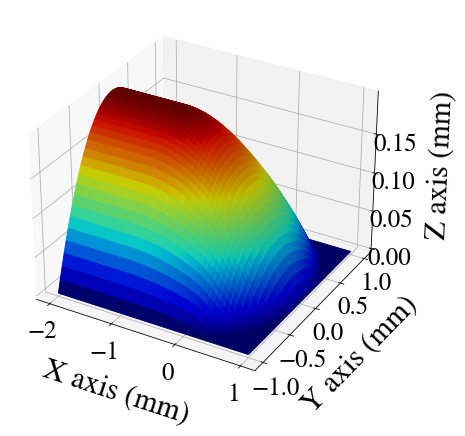

In [17]:
#For further explanations refer to the corresponding scientific article
#The (x,y) = (0,0) point is the deepest point of the melt pool
#The farthest points on the x axis are at x= [-L2, L1]
#h0 is the difference between the reference surface à z=0 and the highest point : z_max = h0
layer = geometry(L2= 0.001, L1 = 0.001, h0 = 0.0002)

layer.show()

# Define the modelisation space

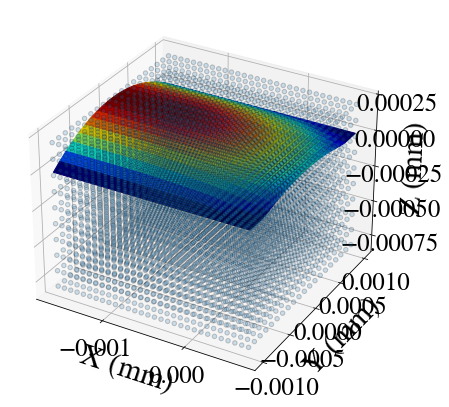

In [15]:
#Here x is 30 mm long, y 20 mm wide and h 10 mm high.
#dx is the spacing between two points. It is the same in the three directions
sp = space(x = 0.0030, y = 0.002, z = 0.001, dx = 0.0001, geom = layer)
sp.show()


# Define the laser heat source

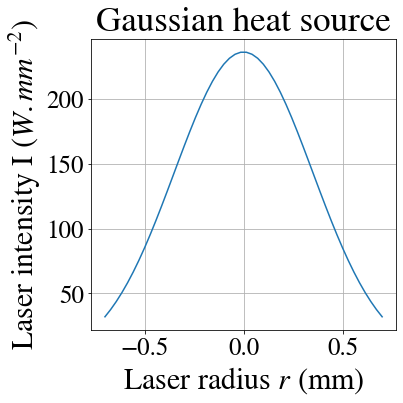

In [4]:
l_650 = laser(rb = 0.0007, beta = 0.449, Pn = 650)
l_350 = laser(rb = 0.0007, beta = 0.449, Pn = 350)
l_250 = laser(rb = 0.0007, beta = 0.449, Pn = 250)
l_0 = laser(rb = 0.0007, beta = 0.449, Pn = 0)


l_350.show()

Solid properties : C = 469.33, k = 13.57, rho = 7960.5946
Liquid properties : C = 512.8299999999999, k = 36.37, rho = 7217.4964
Mixed properties : C = 491.0799999999999, k = 24.97, rho = 7589.0455


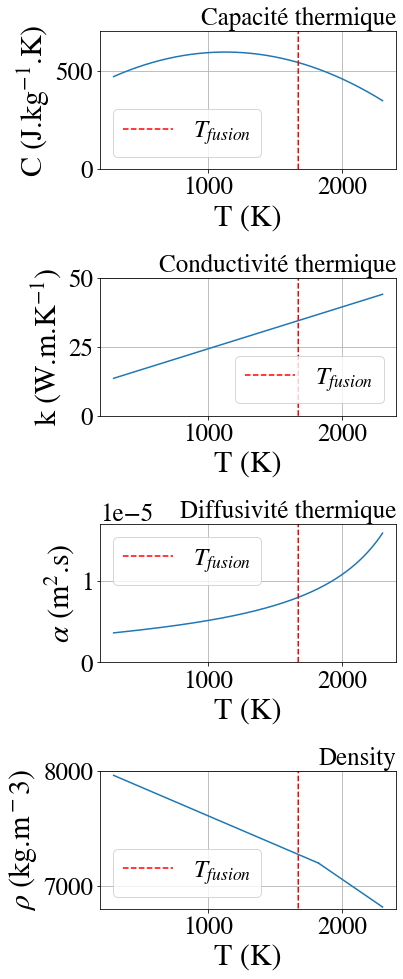

In [5]:
C = lambda T:363.43+0.407*T - 0.00018*T**2
k = lambda T:9.01+0.0152*T
alpha = lambda x:k(x)/C(x)/7960
rho_liq = lambda x : 7981.4164 - 0.8*x+676.08
rho_sol = lambda x : 7961.5946 - 0.5*(x-298)

x_sol = 0.5
x_liq = 1-0.5

T = np.linspace(300, 2300, 2000)
fusy = np.array([i for i in range(8000)])
fus = np.array([1673 for i in range(len(fusy))])

fig, ax = plt.subplots(4,1, figsize = (6,14))
ax[0].set_title('Thermal capacity', fontsize = 25, loc = 'right')
ax[0].plot(T, C(T))
ax[0].plot(fus, fusy , 'r--', label = r'$T_{fusion}$')
ax[0].set_ylabel(r'C (J.kg$^{-1}$.K)')
ax[0].set_xlabel('T (K)')
ax[0].set_ylim(0,700)
ax[0].legend()

ax[1].set_title('Thermal conductivity', fontsize = 25, loc = 'right')
ax[1].plot(T, k(T))
ax[1].set_ylabel(r'k (W.m.K$^{-1}$)')
ax[1].plot(fus, fusy , 'r--', label = r'$T_{fusion}$')
ax[1].set_xlabel('T (K)')
ax[1].set_ylim(0,50)
ax[1].legend()

ax[2].set_title('Thermal diffusivity', fontsize = 25, loc = 'right')
ax[2].plot(T, alpha(T))
ax[2].plot(fus, fusy , 'r--', label = r'$T_{fusion}$')
ax[2].legend()
ax[2].set_ylabel(r'$\alpha$ (m$^{2}$.s)')
ax[2].set_xlabel('T (K)')
ax[2].set_ylim([0,1.7*1e-5])

ax[3].set_title('Density', fontsize = 25, loc = 'right')
ax[3].plot(T[:1523], rho_sol(T[:1523]), c = 'C0')
ax[3].plot(T[1523:], rho_liq(T[1523:]), c = 'C0')
ax[3].plot(fus, fusy , 'r--', label = r'$T_{fusion}$')
ax[3].legend()
ax[3].set_ylabel(r'$\rho$ (kg.m${^-3}$)')
ax[3].set_xlabel('T (K)')
ax[3].set_ylim([6800,8000])


print('Solid properties : C = {}, k = {}, rho = {}'.format(C(300), k(300), rho_sol(300)))
print('Liquid properties : C = {}, k = {}, rho = {}'.format(C(1800), k(1800), rho_liq(1800)))
print('Mixed properties : C = {}, k = {}, rho = {}'.format((C(300)+C(1800))/2, (k(300)+k(1800))/2, (rho_sol(300)+rho_liq(1800))/2))

In [18]:
#constants = [K, Cp, rho, V, tol_z]
#constants = [W.m.K-1, J.kg-1.K, kg.m^-3, m.s-1, m]
constants = [20, 500, 7800, 0.0005,0.00001]
constants_solid = [k(300), C(300), rho_sol(300), 0.005,0.00001]
constants_liquid = [k(1800), C(1800), rho_liq(1800), 0.005,0.00001]
constants_mixed = [(k(300)+k(1800))/2, (C(300)+C(1800))/2, (rho_sol(300)+rho_liq(1800))/2, 0.005,0.00001]

T_350v5_d = temperature(l_350, layer, sp, constants)

In [19]:
T_350v5_d.main()


Step 1: Computation of the temperature (self.T)
avancement 10%
avancement 20%
avancement 30%
avancement 40%
avancement 50%
avancement 60%
avancement 70%
avancement 80%
avancement 90%
Step 2: Get upside view and area (self.camera)
Aire à 1673 K : 66 px = 0.66 mm²
Step 3: Get density (self.T_rho)
You can get help with (self.help_rho / self.show_rho
All done, don't forget to SAVE
T.to_VTK(name) ; T.save(name)


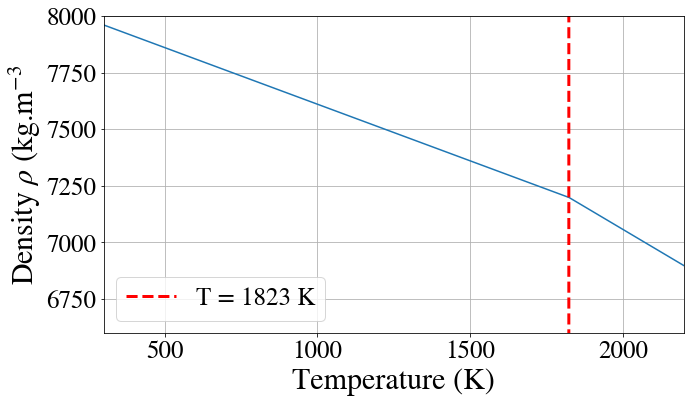

In [20]:
#This is the relation that converts the temperature in terms of density
T_350v5_d.show_rho()

In [21]:
T_350v5_d.save('Results/P350_v5')
#Save as vtk file
T_350v5_d.to_VTK('Results/P350_v5')

T = T_350v5_d.load('Results/P350_v5_T')
rho = T_350v5_d.load('Results/P350_v5_rho')


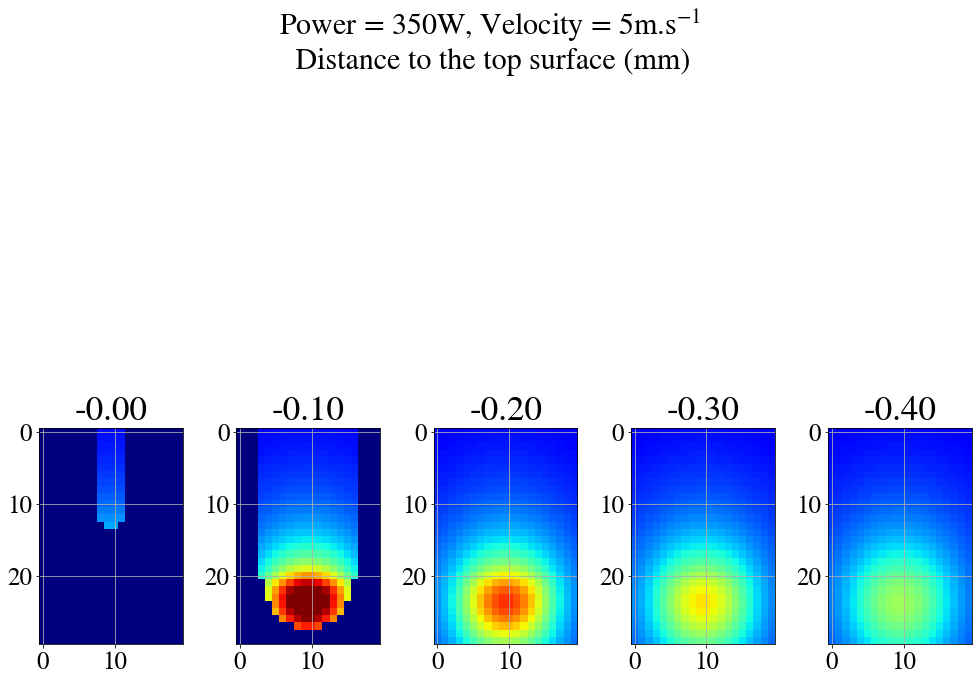

In [34]:
#T_0v5_rho = np.where(T_0v5_rho < 1, 7980, 0)
fig, axs = plt.subplots(1,5, figsize = (14, 14))
fig.suptitle(r'Power = 350W, Velocity = 5m.s$^{-1}$'+'\n Distance to the top surface (mm)')

for i in range(5):
    axs[i].set_title('-{:.2f}'.format(0.1*i))
    axs[i].imshow(T[:,:,-i-1], vmin = 0, vmax = 2500, cmap ='jet')